In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

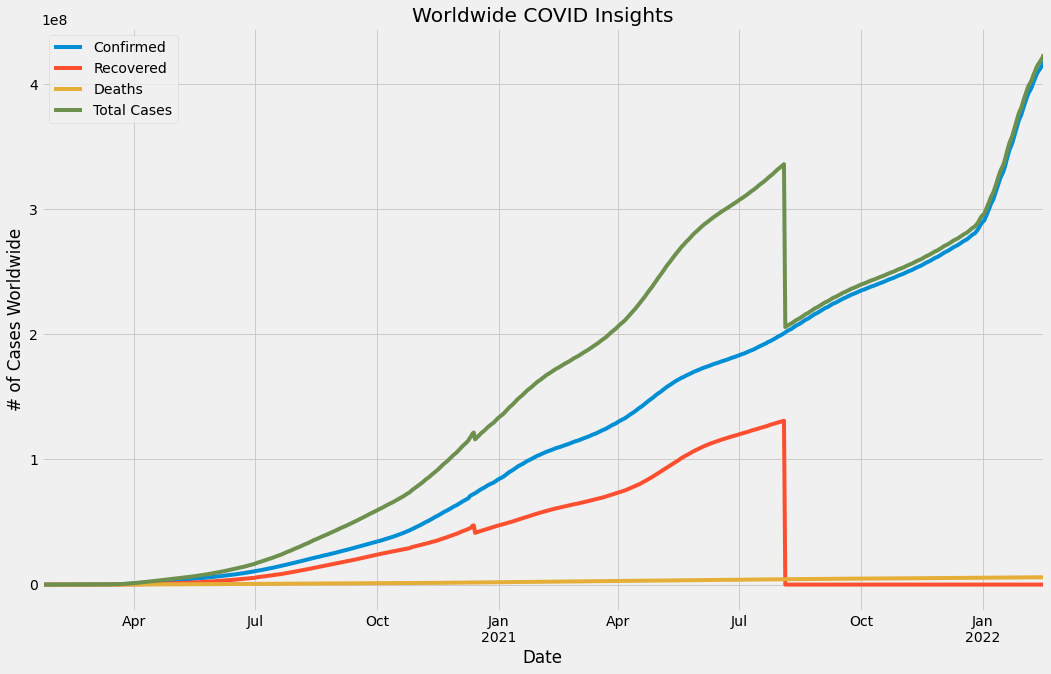

In [24]:
#Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

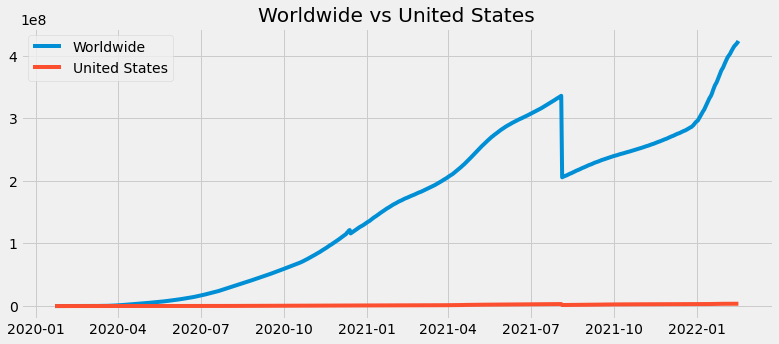

In [86]:
Philippines_df = df[df['Country']=="Philippines"].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label ='Worldwide')
ax.plot(Philippines_df[['Total Cases']], label ='United States')
ax.set_xlabel=('Date')
ax.set_ylabel=('# of Total Cases')
ax.title.set_text('Worldwide vs United States')

plt.legend(loc='upper left')
plt.show()

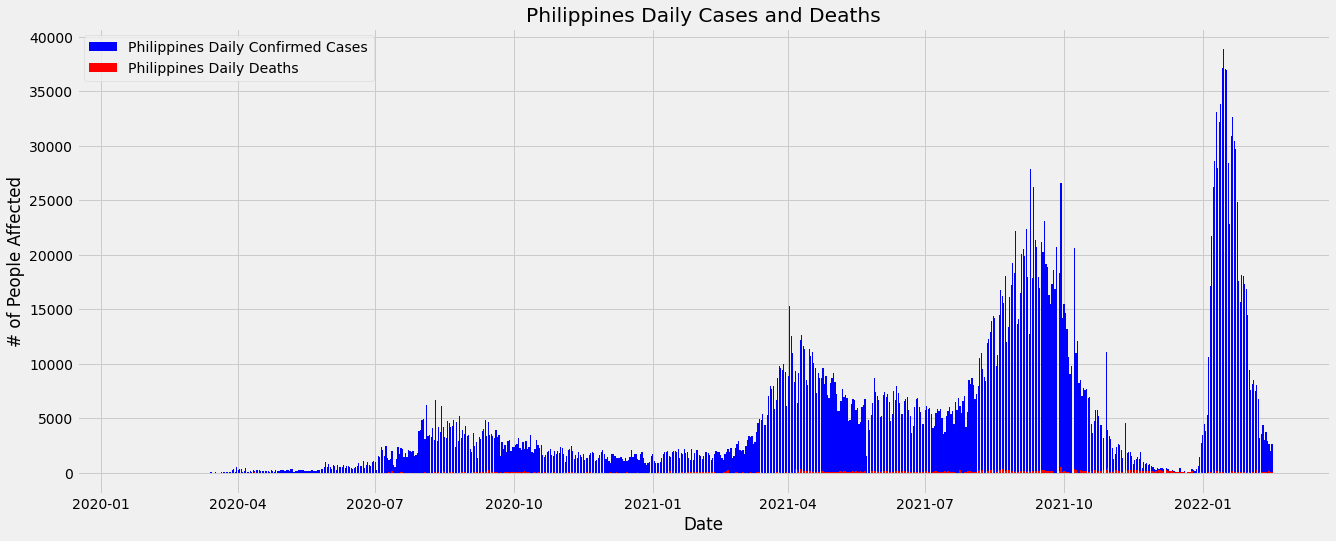

In [93]:
# United States Daily Cases and Deaths
# If you run the code from the previous cell, since we groupby we need to reset_index ot access the Date Column
Philippines_df = Philippines_df.reset_index()
Philippines_df['Daily Confirmed'] = Philippines_df['Confirmed'].sub(Philippines_df['Confirmed'].shift())
Philippines_df['Daily Deaths'] = Philippines_df['Deaths'].sub(Philippines_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(Philippines_df['Date'], Philippines_df['Daily Confirmed'], color='b', label='Philippines Daily Confirmed Cases')
ax.bar(Philippines_df['Date'], Philippines_df['Daily Deaths'], color='r', label='Philippines Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Philippines Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

In [98]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['Rest of World'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10

C:\Users\Admin\AppData\Local\Temp\ipykernel_8904\441396608.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_10.loc['Rest of World'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()


,Date,Country,Confirmed,Recovered,Deaths,Total Cases
Rest of World,NaN,0.0,0.0,0.0,0.0,0.0
